# Analysis of Municipal Energy Consumption in San Francisco

## Overview
This notebook contains the exploration of energy use/sq.ft of municipal buildings in an effort to lower energy consumption.

To accomplish this, data was explored and fit into a linear model to analyze the effect of each independent variable.

## Business Problem
With energy conservation becoming a priority in the country, the city of San Francisco is looking for recommendations to decrease energy consumption. With data from municiple buildings, find areas where improvement is possible.

## Data
The data for this analysis originates from the city of San Francisco and describes energy benchmarks from roughly 500 buildings from the year 2019.

The data can be found and downloaded [here](https://data.sfgov.org/Energy-and-Environment/San-Francisco-Municipal-Energy-Benchmarking/k3fc-45qw).

In [1]:
# Library Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import data as a dataframe
df = pd.read_csv('data/San_Francisco_Municipal_Energy_Benchmarking.csv')
df.head()

,Parcel(s),SFPUC Code,Building Address,Facility,Notes,Department Name,Department Code,Building Category,Facility Type,Year Built,Year Renovated,Building Floor Area (sq.ft.),2019 ENERGY STAR score,2019 Energy Use Intensity (kBtu/sq.ft.),2019 Carbon Intensity (lbs CO2e/sq.ft.)
0,4380/010,1393,1399 Marin St,1399 Marin - Maintenance Facility,Building with no gas services.,Municipal Transportation Agency,SFMTA,"Service, Repair, and Storage",Corporation Yard / Vehicle Repair,1972.0,NaN,25100,NaN,54.247877,0.000000
1,3904/001,1292,1401 Bryant St,1401 Bryant - Overhead Lines,This location was under construction or vacant...,Municipal Transportation Agency,SFMTA,"Service, Repair, and Storage",Other Shops,1897.0,1979.0,46000,NaN,9.316736,0.026315
2,3512/005,1887,1650 Mission St,1650 Mission St,NaN,Real Estate Division,RED,Offices,General Office,1983.0,NaN,219631,91.0,40.306205,1.293485
3,3512/006,1150,1660 Mission St,1660 Mission St,NaN,Real Estate Division,RED,Offices,General Office,1990.0,NaN,82964,49.0,82.818692,1.468304
4,3512/009,779,1680 Mission St,1680 Mission St,NaN,Department of Public Works,DPW,Offices,General Office,1923.0,NaN,40053,54.0,84.047656,4.938382


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Parcel(s)                                491 non-null    object 
 1   SFPUC Code                               491 non-null    int64  
 2   Building Address                         491 non-null    object 
 3   Facility                                 491 non-null    object 
 4   Notes                                    114 non-null    object 
 5   Department Name                          491 non-null    object 
 6   Department Code                          491 non-null    object 
 7   Building Category                        491 non-null    object 
 8   Facility Type                            491 non-null    object 
 9   Year Built                               476 non-null    float64
 10  Year Renovated                           143 non-n

## Initial Data Prep

In [4]:
# Checking for missing values
df.isna().sum()

Parcel(s)                                    0
SFPUC Code                                   0
Building Address                             0
Facility                                     0
Notes                                      377
Department Name                              0
Department Code                              0
Building Category                            0
Facility Type                                0
Year Built                                  15
Year Renovated                             348
Building Floor Area (sq.ft.)                 0
2019 ENERGY STAR score                     328
2019 Energy Use Intensity (kBtu/sq.ft.)      0
2019 Carbon Intensity (lbs CO2e/sq.ft.)      0
dtype: int64

In [5]:
# Check for values acting as defaults per column
for column in df.columns:
    print(column, '\n' ,df[column].value_counts(), '\n')

Parcel(s) 
 4380/010      1
5930/001      1
4830/016      1
2094/013-A    1
3506/001      1
             ..
5720/059      1
1532/007      1
3935/002      1
0077/024      1
6529/020      1
Name: Parcel(s), Length: 491, dtype: int64 

SFPUC Code 
 1393    1
373     1
124     1
255     1
1886    1
       ..
39      1
38      1
35      1
34      1
2018    1
Name: SFPUC Code, Length: 491, dtype: int64 

Building Address 
 3223 Ortega St          2
766 Vallejo St          2
36th Ave & JFK Jr Dr    2
451 Jersey St           1
1 S Van Ness Ave        1
                       ..
441 12th Ave            1
299 Vermont St          1
1814 Stockton St        1
80 Digby St             1
421 Bartlett St         1
Name: Building Address, Length: 488, dtype: int64 

Facility 
 1399 Marin - Maintenance Facility    1
Palega Rec Center                    1
Paint Shop and Vehicle Parking       1
Ortega Branch Library                1
One South Van Ness (OSVN)            1
                                   

#### Notes:
The Parcel, sfpuc, building address, and Facility columns are unique identifiers (with the exception of three pairs of addresses). 

These columns will be dropped from our working dataframe, but can be referenced later by index if needed utilizing a `dropped_df` dataframe.

Also, Reading through the "Notes" column values, most are unique to only a few buildings or reveal if the building has no gas services. The lack of gas services may be important but the rest of the information is outside of the scope of this initial investigation.

Lastly, Department Name and Department Code are redundant, so the code column will be dropped

In [6]:
# Create dropped_df, drop columns
drop_columns = df.columns[:4]
dropped_df = df[drop_columns]
df.drop(columns=drop_columns, inplace=True)
df.drop(columns=['Department Code'], inplace=True)
df.head()

,Notes,Department Name,Building Category,Facility Type,Year Built,Year Renovated,Building Floor Area (sq.ft.),2019 ENERGY STAR score,2019 Energy Use Intensity (kBtu/sq.ft.),2019 Carbon Intensity (lbs CO2e/sq.ft.)
0,Building with no gas services.,Municipal Transportation Agency,"Service, Repair, and Storage",Corporation Yard / Vehicle Repair,1972.0,NaN,25100,NaN,54.247877,0.000000
1,This location was under construction or vacant...,Municipal Transportation Agency,"Service, Repair, and Storage",Other Shops,1897.0,1979.0,46000,NaN,9.316736,0.026315
2,NaN,Real Estate Division,Offices,General Office,1983.0,NaN,219631,91.0,40.306205,1.293485
3,NaN,Real Estate Division,Offices,General Office,1990.0,NaN,82964,49.0,82.818692,1.468304
4,NaN,Department of Public Works,Offices,General Office,1923.0,NaN,40053,54.0,84.047656,4.938382


In [7]:
# Create column indicating if a building has gas services, store notes_df for reference and drop notes column
df['Gas Services'] = df['Notes'].map(lambda x: 0 if x == 'Building with no gas services.' else 1)
notes_df = df['Notes']
df.drop(columns=['Notes'], inplace=True)

Lastly, carbon intensity is outside the scope of this initial analysis

In [8]:
# Drop Carbon Intensity Column, preview data
df.drop(columns=['2019 Carbon Intensity (lbs CO2e/sq.ft.)'], inplace=True)
df.head()

,Department Name,Building Category,Facility Type,Year Built,Year Renovated,Building Floor Area (sq.ft.),2019 ENERGY STAR score,2019 Energy Use Intensity (kBtu/sq.ft.),Gas Services
0,Municipal Transportation Agency,"Service, Repair, and Storage",Corporation Yard / Vehicle Repair,1972.0,NaN,25100,NaN,54.247877,0
1,Municipal Transportation Agency,"Service, Repair, and Storage",Other Shops,1897.0,1979.0,46000,NaN,9.316736,1
2,Real Estate Division,Offices,General Office,1983.0,NaN,219631,91.0,40.306205,1
3,Real Estate Division,Offices,General Office,1990.0,NaN,82964,49.0,82.818692,1
4,Department of Public Works,Offices,General Office,1923.0,NaN,40053,54.0,84.047656,1


## Exploratory Data Analysis

In [9]:
# Separate numerical from categorical columns
numerical = ['Year Built', 'Year Renovated', 'Building Floor Area (sq.ft.)',
             '2019 ENERGY STAR score', '2019 Energy Use Intensity (kBtu/sq.ft.)']
categorical = ['Department Name', 'Building Category', 'Facility Type', 'Gas Services']

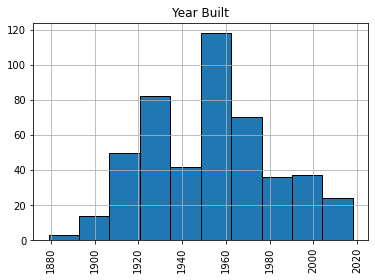

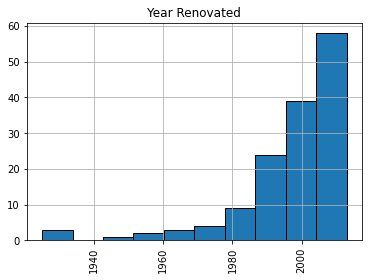

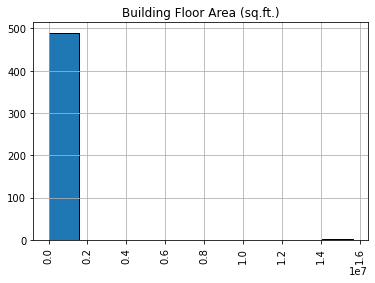

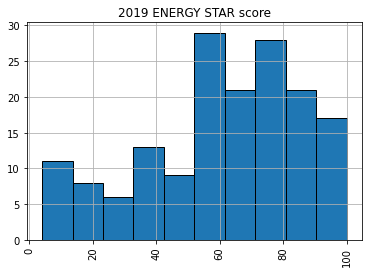

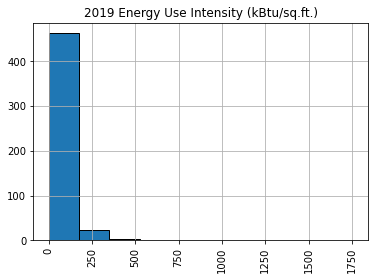

In [10]:
# Histograms
for column in numerical:
    df[column].hist(ec='black')
    plt.title(column)
    plt.xticks(rotation = 90)
    plt.show()

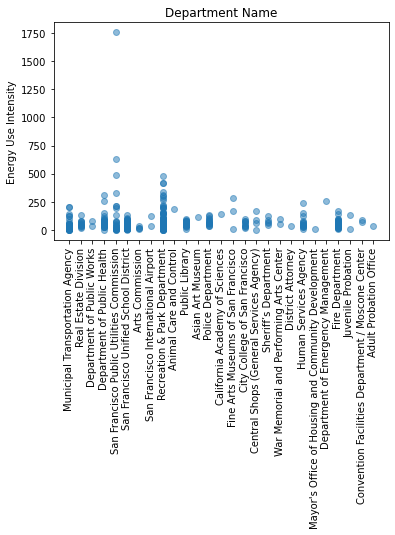

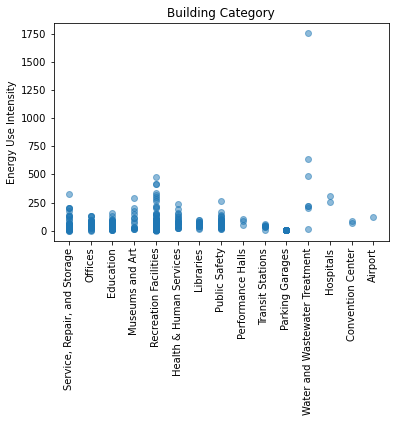

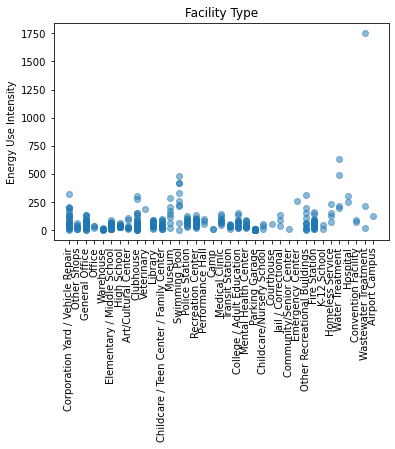

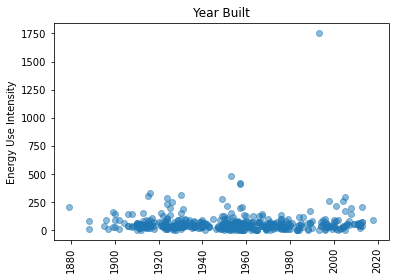

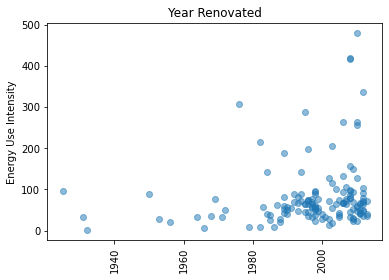

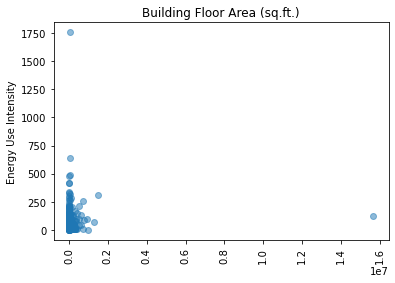

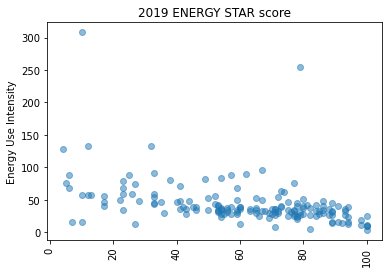

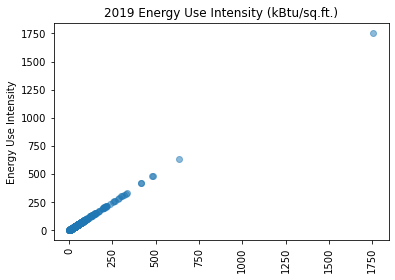

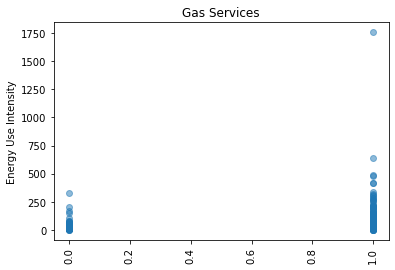

In [11]:
# Scatter Plots
for column in df.columns:
    plt.scatter(df[column], df['2019 Energy Use Intensity (kBtu/sq.ft.)'], alpha=.5)
    plt.title(column)
    plt.ylabel('Energy Use Intensity')
    plt.xticks(rotation = 90)
    plt.show()

#### Note:
It is apparent that there are 2 large outliers.

In [12]:
# Check for data points with extreme energy use
df[df['2019 Energy Use Intensity (kBtu/sq.ft.)']>1000]

,Department Name,Building Category,Facility Type,Year Built,Year Renovated,Building Floor Area (sq.ft.),2019 ENERGY STAR score,2019 Energy Use Intensity (kBtu/sq.ft.),Gas Services
331,San Francisco Public Utilities Commission,Water and Wastewater Treatment,Wastewater Treatment,1993.0,NaN,49000,NaN,1756.194667,1


In [13]:
df[df['Building Floor Area (sq.ft.)']>4000000]

,Department Name,Building Category,Facility Type,Year Built,Year Renovated,Building Floor Area (sq.ft.),2019 ENERGY STAR score,2019 Energy Use Intensity (kBtu/sq.ft.),Gas Services
386,San Francisco International Airport,Airport,Airport Campus,1954.0,NaN,15654508,NaN,124.155945,1


In [14]:
# Check building details for insight
dropped_df.iloc[331]

Parcel(s)                                          7281/007
SFPUC Code                                              169
Building Address                             3500 Great Hwy
Facility            Oceanside Water Pollution Control Plant
Name: 331, dtype: object

#### Note:
The water pollution control plant may be a special case outlier. For this initial investigation it will be excluded.
The airport may also be a special case and may skew results. For this investigation it will be excluded.

Once removed, histograms and scatterplots will be reviewed

In [15]:
# Drop outlier
df.drop(index=[331, 386], inplace=True)

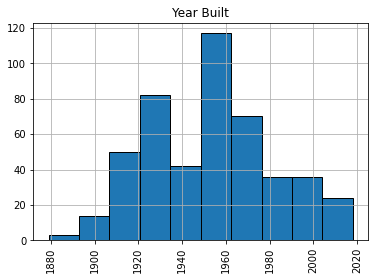

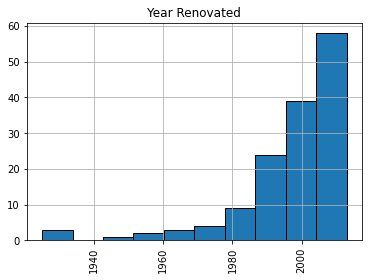

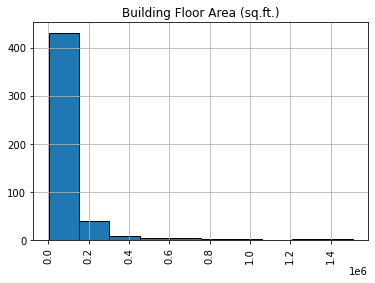

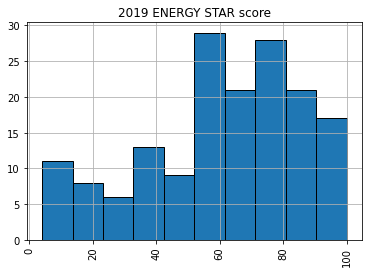

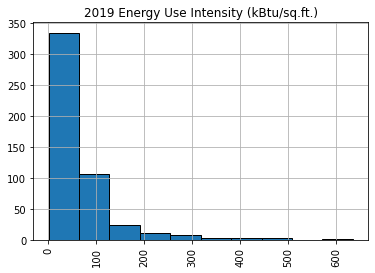

In [16]:
# Histograms
for column in numerical:
    df[column].hist(ec='black')
    plt.title(column)
    plt.xticks(rotation = 90)
    plt.show()

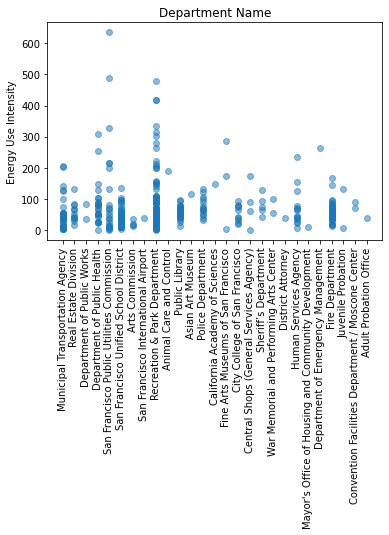

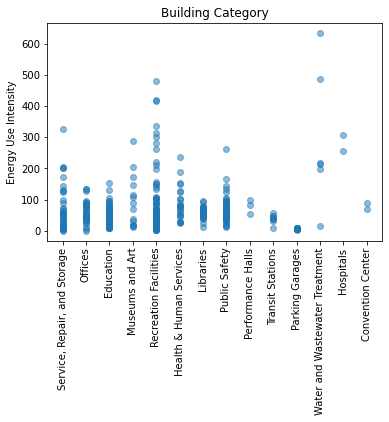

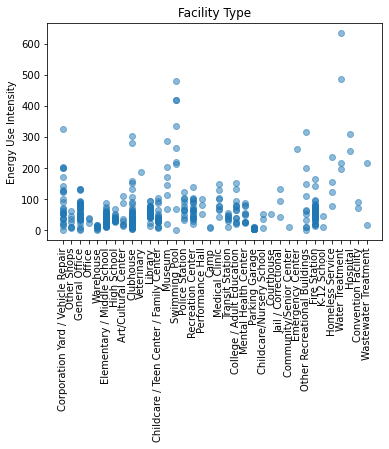

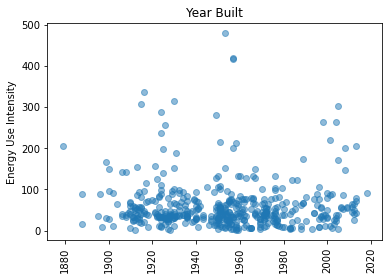

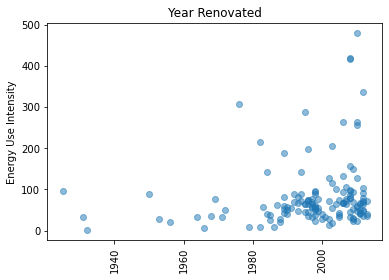

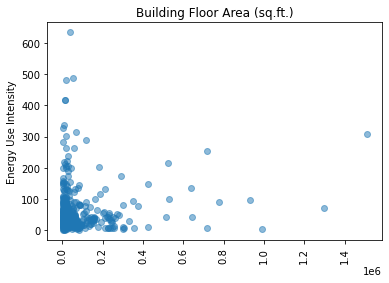

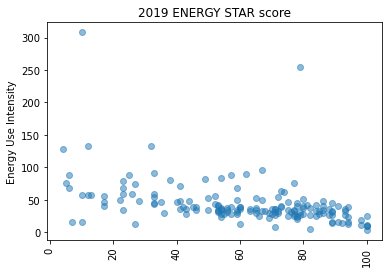

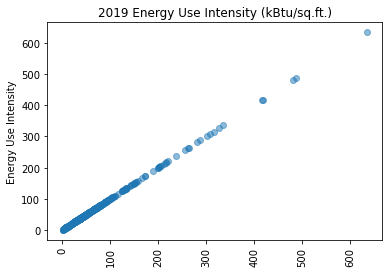

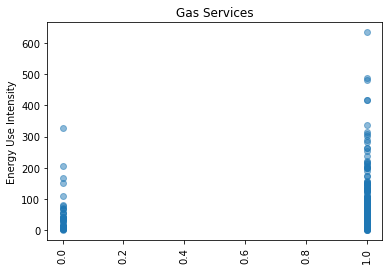

In [17]:
# Scatter Plots
for column in df.columns:
    plt.scatter(df[column], df['2019 Energy Use Intensity (kBtu/sq.ft.)'], alpha=.5)
    plt.title(column)
    plt.ylabel('Energy Use Intensity')
    plt.xticks(rotation = 90)
    plt.show()

## Data Prep for Regression Analysis

Before data can be fit to a model, missing values must be dealt with.

In [18]:
# Check how many values are missing
df.isna().sum()

Department Name                              0
Building Category                            0
Facility Type                                0
Year Built                                  15
Year Renovated                             346
Building Floor Area (sq.ft.)                 0
2019 ENERGY STAR score                     326
2019 Energy Use Intensity (kBtu/sq.ft.)      0
Gas Services                                 0
dtype: int64

More than half of the buildings have no data on reservations or energy star score. For now those columns will be dropped, but may be revisited.

only 15 rows are missing data for year built. those rows will be dropped.

In [19]:
df.drop(columns=['Year Renovated', '2019 ENERGY STAR score'], inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 490
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Department Name                          474 non-null    object 
 1   Building Category                        474 non-null    object 
 2   Facility Type                            474 non-null    object 
 3   Year Built                               474 non-null    float64
 4   Building Floor Area (sq.ft.)             474 non-null    int64  
 5   2019 Energy Use Intensity (kBtu/sq.ft.)  474 non-null    float64
 6   Gas Services                             474 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 29.6+ KB


Separate into dependent variable and independent variables.
Categorical variables must be one hot encoded.

In [20]:
X = df.drop('2019 Energy Use Intensity (kBtu/sq.ft.)', axis=1)
y = df['2019 Energy Use Intensity (kBtu/sq.ft.)']

In [21]:
X = pd.get_dummies(X, drop_first=True)

Data should be split into a test sample and a train sample, then standardized.
But for the sake of time the model may be standardized then trained on the full set.

Overfitting will be addressed if time allows

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Year Built,Building Floor Area (sq.ft.),Gas Services,Department Name_Animal Care and Control,Department Name_Arts Commission,Department Name_Asian Art Museum,Department Name_California Academy of Sciences,Department Name_Central Shops (General Services Agency),Department Name_City College of San Francisco,Department Name_Convention Facilities Department / Moscone Center,...,Facility Type_Other Shops,Facility Type_Parking Garage,Facility Type_Performance Hall,Facility Type_Police Station,Facility Type_Recreation Center,Facility Type_Swimming Pool,Facility Type_Transit Station,Facility Type_Veterinary,Facility Type_Warehouse,Facility Type_Wastewater Treatment
0,0.657951,-0.313672,-2.760105,-0.04598,-0.092253,-0.04598,-0.04598,-0.092253,-0.146805,-0.065094,...,-0.122431,-0.215308,-0.079809,-0.154137,-0.204348,-0.139122,-0.131024,-0.04598,-0.113228,-0.065094
1,-1.908447,-0.172505,0.362305,-0.04598,-0.092253,-0.04598,-0.04598,-0.092253,-0.146805,-0.065094,...,8.167881,-0.215308,-0.079809,-0.154137,-0.204348,-0.139122,-0.131024,-0.04598,-0.113228,-0.065094
2,1.034356,1.000269,0.362305,-0.04598,-0.092253,-0.04598,-0.04598,-0.092253,-0.146805,-0.065094,...,-0.122431,-0.215308,-0.079809,-0.154137,-0.204348,-0.139122,-0.131024,-0.04598,-0.113228,-0.065094
3,1.273887,0.077165,0.362305,-0.04598,-0.092253,-0.04598,-0.04598,-0.092253,-0.146805,-0.065094,...,-0.122431,-0.215308,-0.079809,-0.154137,-0.204348,-0.139122,-0.131024,-0.04598,-0.113228,-0.065094
4,-1.018763,-0.212673,0.362305,-0.04598,-0.092253,-0.04598,-0.04598,-0.092253,-0.146805,-0.065094,...,-0.122431,-0.215308,-0.079809,-0.154137,-0.204348,-0.139122,-0.131024,-0.04598,-0.113228,-0.065094


## Linear Model
A linear model will give us an idea on how each of our variables affect Energy Use Intensity.
Note that the input variables have been scaled so the coefficients may be misleading.

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lin_reg = LinearRegression()

In [45]:
lin_reg.fit(X_scaled, y)

LinearRegression()

## Order the Coefficients to show most impactful factors on energy use

In [59]:
coeff_list = []
for i in range(len(X_scaled.columns)):
    coeff_list.append((X_scaled.columns[i], lin_reg.coef_[i]))

In [60]:
sorted(coeff_list, key = lambda x: x[1], reverse=True)

[('Department Name_Animal Care and Control', 32911516080411.434),
 ('Facility Type_Elementary / Middle School', 18810813088331.51),
 ('Facility Type_Childcare / Teen Center / Family Center', 9601308168232.229),
 ('Building Category_Hospitals', 9269476179945.562),
 ('Facility Type_High School', 9128641648493.76),
 ('Facility Type_College / Adult Education', 7800269786785.256),
 ('Facility Type_General Office', 7328004628971.983),
 ('Facility Type_Wastewater Treatment', 5180224664968.075),
 ('Facility Type_Childcare/Nursery School', 3787551667243.0137),
 ('Building Category_Public Safety', 3458990390846.041),
 ('Facility Type_K-12 School', 3095804178811.169),
 ('Facility Type_Medical Clinic', 2118696925490.742),
 ('Facility Type_Mental Health Center', 2118696925484.8333),
 ('Facility Type_Office', 2114851530706.6763),
 ('Facility Type_Corporation Yard / Vehicle Repair', 1664253243943.019),
 ('Facility Type_Homeless Service', 1420038208110.0815),
 ('Facility Type_Courthouse', 122359973251

## Conclusions
From the list above, it can be derived that Animal Control uses the most energy per sq.ft, followed by schools and colleges.

In conclusion, if San Francisco officials want to decrease energy usage, the infrastructure of schools and colleges may need to be investigated for deeper issues affecting efficiency.

## Future Work
Given more time, I would have switched my modeling library to statsmodels, as it has statistical significance of independent variables built into the OLS class and has a very tidy summary. Unfortunately, I ran into a snag  regarding input dimentions while down to the wire and needed to document my work.